In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [5]:
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
# Deleting blank columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
# Null values observation.
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# Drop the null values
df.dropna(inplace = True)

In [14]:
df["Amount"] = df["Amount"].astype("int")

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
# Mathematical Description

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Now the EDA can be started after the data cleaning

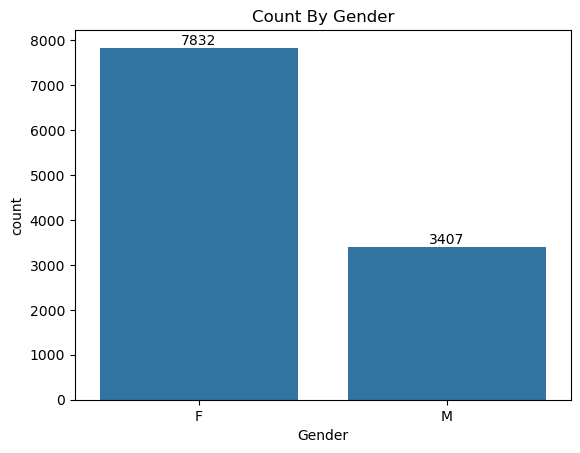

In [18]:
ax = sns.countplot(x = "Gender" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count By Gender")
plt.show()

In [19]:
df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount" , ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

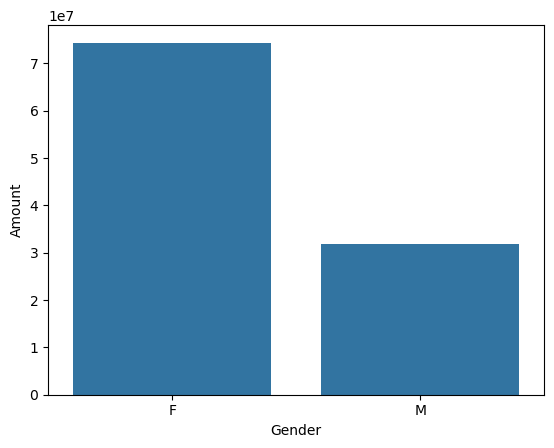

In [21]:
sales_gen = df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount" , ascending = False)
sns.barplot(x = "Gender" , y = "Amount" , data = sales_gen)

From the above graph we can conclude that most of the buyers are females and even the purchasing power of females are greater than men

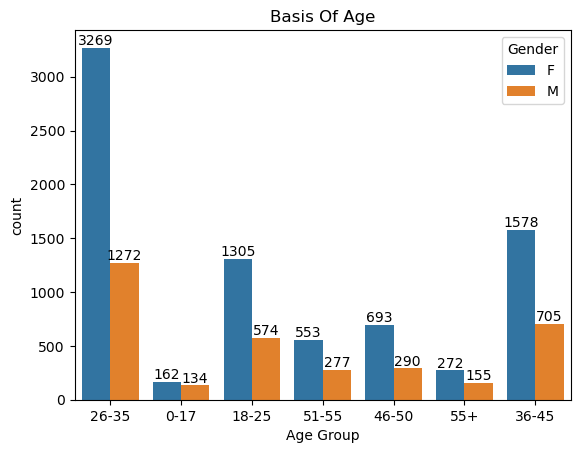

In [23]:
ax = sns.countplot(x = "Age Group", data = df, hue = "Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Basis Of Age")
plt.show()

<Axes: xlabel='State', ylabel='Orders'>

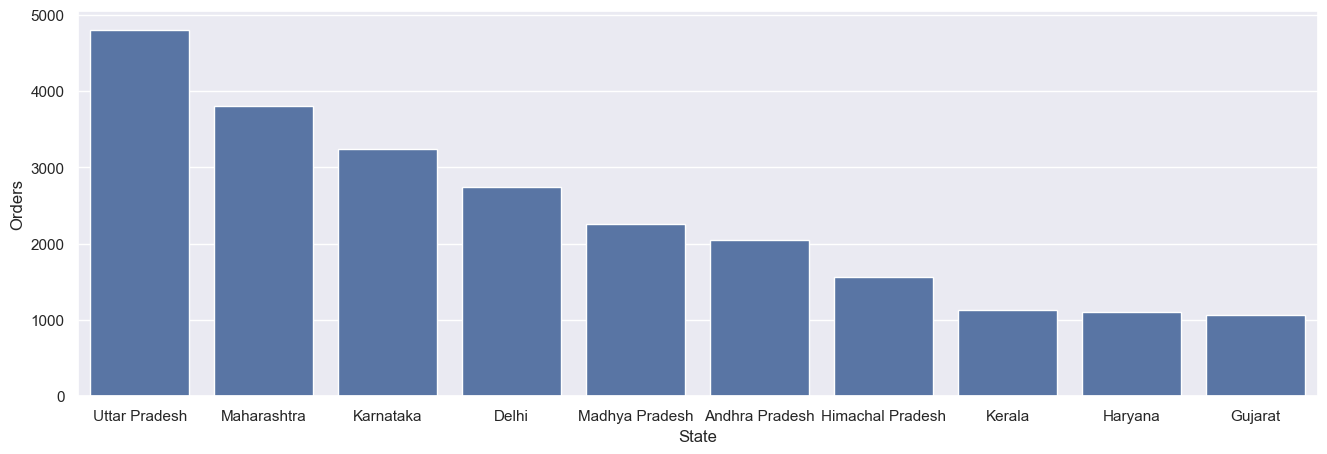

In [30]:
# Total no. of orders from top 10 states

sales_state = df.groupby(["State"], as_index = False)["Orders"].sum().sort_values(by = "Orders" , ascending = False).head(10)

sns.set(rc={"figure.figsize" : (16,5)})
sns.barplot(data = sales_state, x = "State" , y =  "Orders")



<Axes: xlabel='State', ylabel='Amount'>

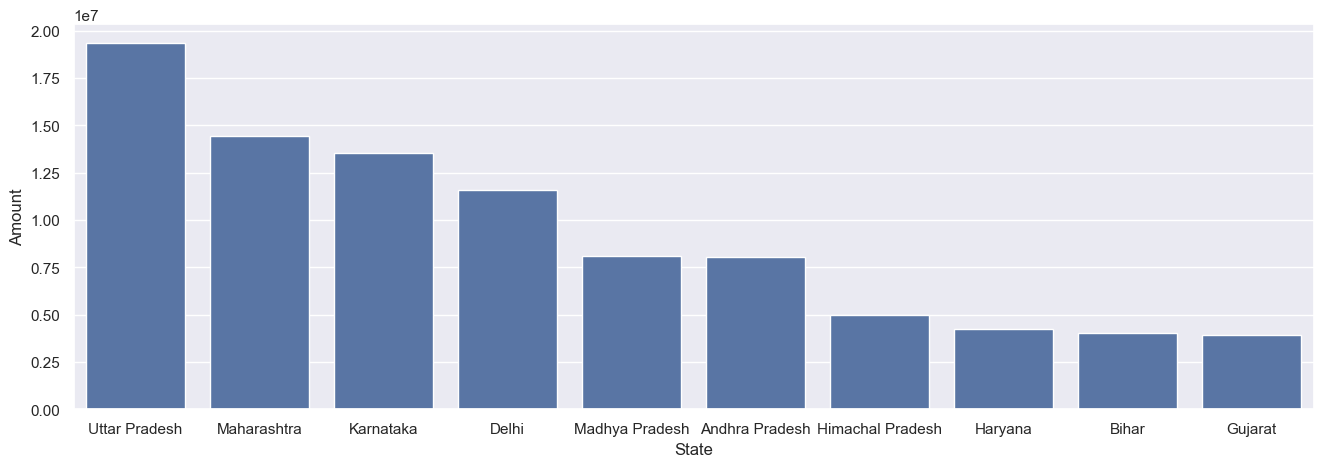

In [31]:
#Total amount/sales from top 10 states

sales_state = df.groupby(["State"], as_index = False)["Amount"].sum().sort_values(by = "Amount" , ascending = False).head(10)
sns.set(rc={"figure.figsize" : (16,5)})
sns.barplot(data = sales_state, x = "State" , y =  "Amount")



From the above graphs I can conclude that most of the orders are from Uttar Pradesh , Maharastra and Karnataka respectively.

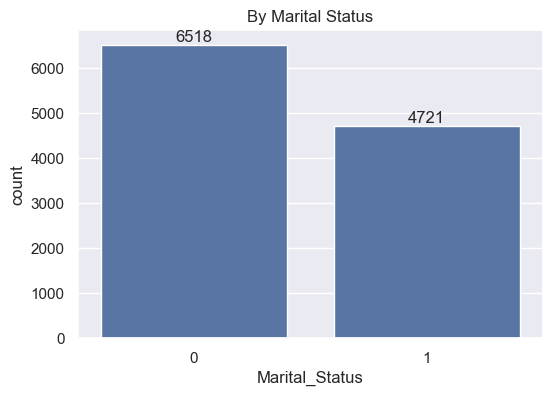

In [35]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "Marital_Status" , data = df)
ax.bar_label(ax.containers[0])
plt.title("By Marital Status")
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Amount'>

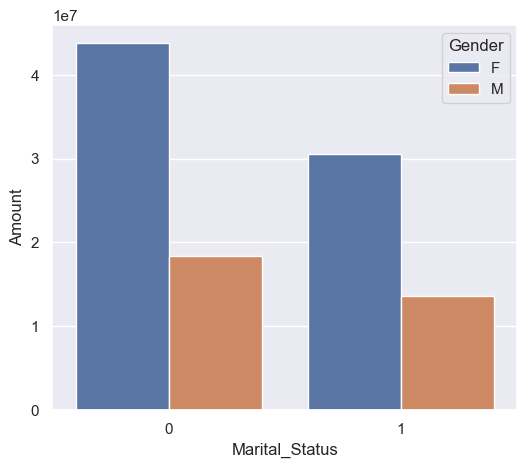

In [37]:
sales_state = df.groupby(["Marital_Status","Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount" , ascending = False)
sns.set(rc={"figure.figsize" : (6,5)})
sns.barplot(data = sales_state, x = "Marital_Status" , y =  "Amount", hue = "Gender")



From the above graphs we can see that most of the buyers are married(women) and they have high purchasing power.

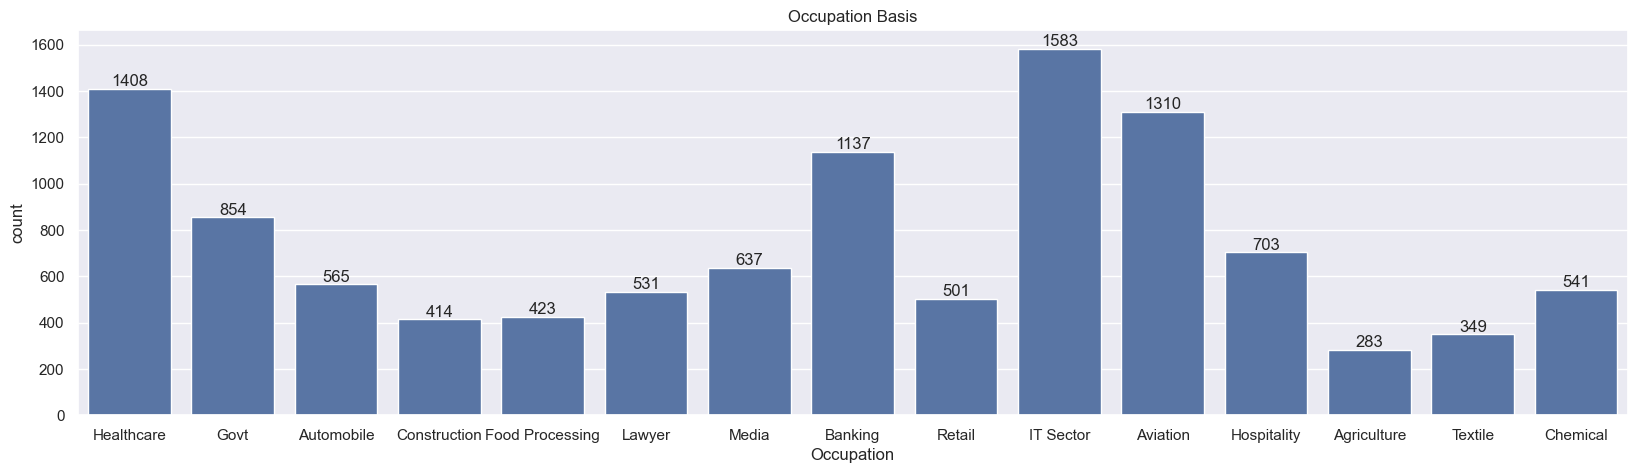

In [38]:
plt.figure(figsize = (20,5))
ax = sns.countplot(x = "Occupation" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Occupation Basis")
plt.show()

<Axes: xlabel='Occupation', ylabel='Amount'>

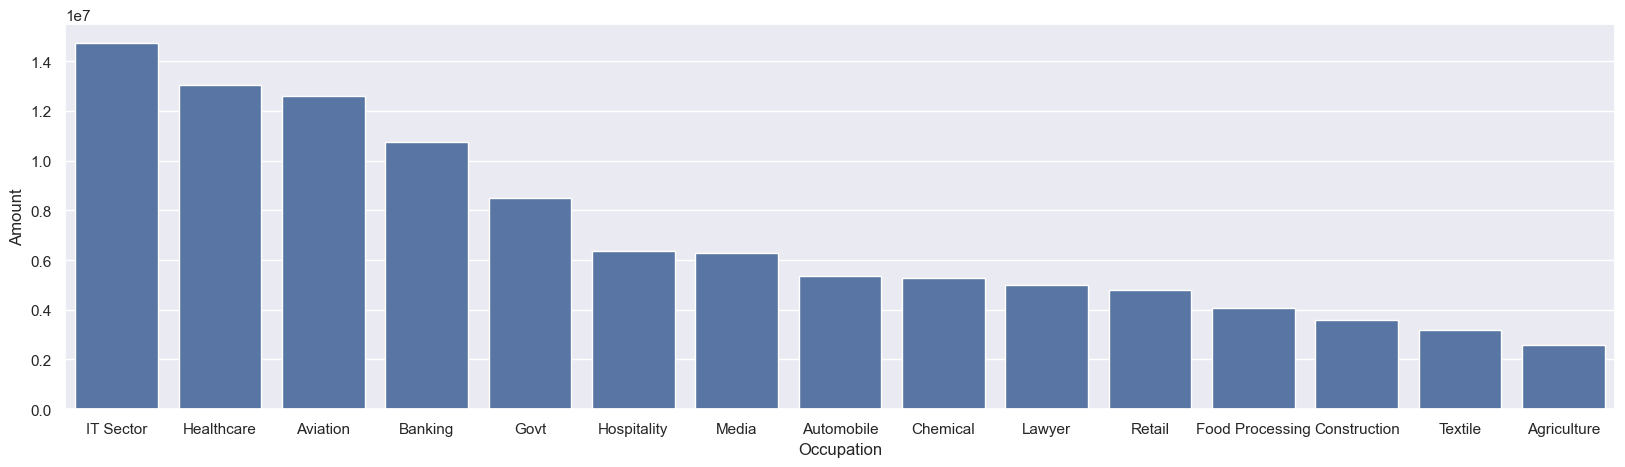

In [39]:
sales_state = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by = "Amount" , ascending = False)
sns.set(rc={"figure.figsize" : (20,5)})
sns.barplot(data = sales_state, x = "Occupation" , y =  "Amount")



From the above graph most of the buyers are IT sector, Healthcare and Aviation.

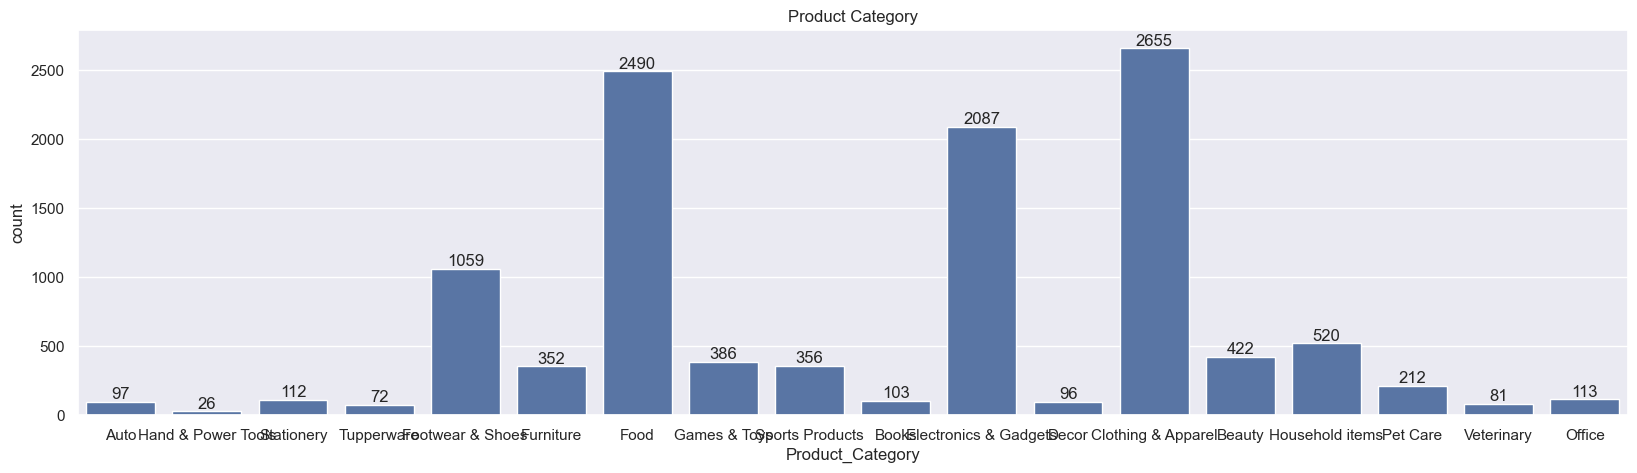

In [40]:
plt.figure(figsize = (20,5))
ax = sns.countplot(x = "Product_Category" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Product Category")
plt.show()

<Axes: xlabel='Product_Category', ylabel='Amount'>

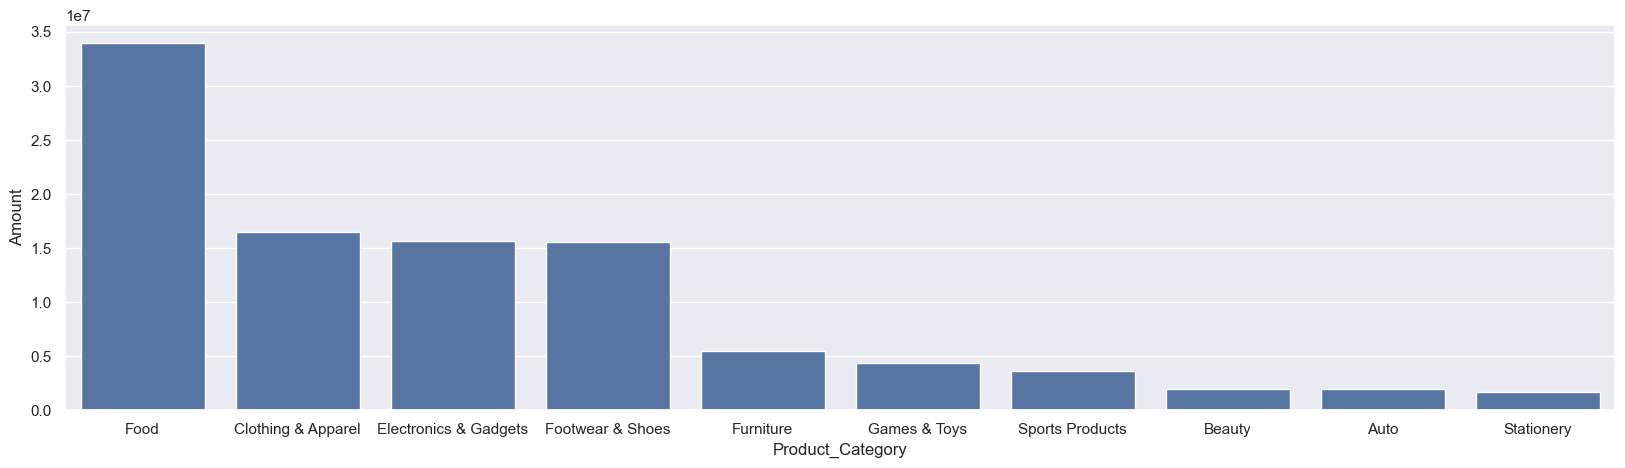

In [42]:
# Top 10 sold products
sales_state = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount" , ascending = False).head(10)
sns.set(rc={"figure.figsize" : (20,5)})
sns.barplot(data = sales_state, x = "Product_Category" , y =  "Amount")



From the above we can see that most of the sold products are Food,  Footwear and Electronics category

Conclusion :  Married women age group 26-35yrs from Uttar Pradesh , Maharastra and Karnataka working in IT sector , Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics Category!!